In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
data_path = os.path.join(os.getcwd(), '../data', 'regression_part2.csv')
df = pd.read_csv(data_path, delimiter = ',')

In [3]:
x = df['input']
y = df['output']

x = np.array(x)[:, np.newaxis]
y_true = np.array(y)[:, np.newaxis]

In [4]:
poly1 = PolynomialFeatures(degree=1)
X1 = poly1.fit_transform(x)
reg1 = LinearRegression(fit_intercept=False)
model1 = reg1.fit(X1, y_true)
y1 = model1.predict(X1)

use1 = np.concatenate((x, y1), axis=1)
use1 = use1[np.lexsort(use1[:,::-1].T)]

In [5]:
poly2 = PolynomialFeatures(degree=2)
X2 = poly2.fit_transform(x)
reg2 = LinearRegression(fit_intercept=False)
model2 = reg2.fit(X2, y_true)
y2 = model2.predict(X2)

use2 = np.concatenate((x, y2), axis=1)
use2 = use2[np.lexsort(use2[:,::-1].T)]

In [6]:
poly3 = PolynomialFeatures(degree=3)
X3 = poly3.fit_transform(x)
reg3 = LinearRegression(fit_intercept=False)
model3 = reg3.fit(X3, y_true)
y3 = model3.predict(X3)

use3 = np.concatenate((x, y3), axis=1)
use3 = use3[np.lexsort(use3[:,::-1].T)]

In [7]:
poly4 = PolynomialFeatures(degree=4)
X4 = poly4.fit_transform(x)
reg4 = LinearRegression(fit_intercept=False)
model4 = reg4.fit(X4, y_true)
y4 = model4.predict(X4)

use4 = np.concatenate((x, y4), axis=1)
use4 = use4[np.lexsort(use4[:,::-1].T)]

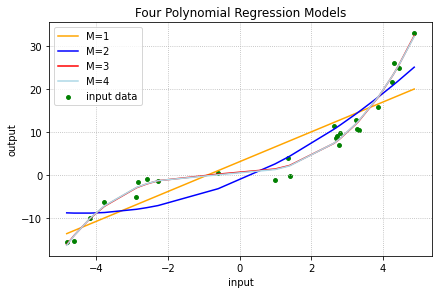

In [8]:
plt.title('Four Polynomial Regression Models')
plt.grid(linestyle=':')

plt.scatter(x, y_true, s=60, marker='.', c='green', label='input data')

plt.plot(use1[:,0], use1[:,1], c='orange', label='M=1')
plt.plot(use2[:,0], use2[:,1], c='blue', label='M=2')
plt.plot(use3[:,0], use3[:,1], c='red', label='M=3')
plt.plot(use4[:,0], use4[:,1], c='lightblue', label='M=4')

plt.tight_layout()
plt.legend()

plt.xlabel('input')
plt.ylabel('output')
plt.show()

In [9]:
mse=[]
mse.append(mean_squared_error(y_true, y1))
mse.append(mean_squared_error(y_true, y2))
mse.append(mean_squared_error(y_true, y3))
mse.append(mean_squared_error(y_true, y4))
model = ['M=1', 'M=2', 'M=3', 'M=4']

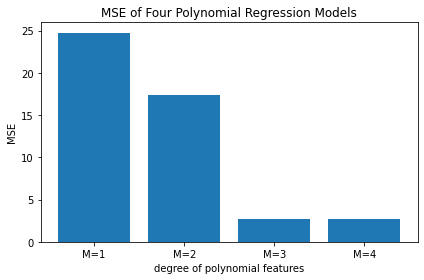

In [10]:
plt.bar(model, mse)
plt.xlabel('degree of polynomial features')
plt.ylabel('MSE')
plt.title('MSE of Four Polynomial Regression Models')
plt.tight_layout()
plt.show()

In [11]:
c1 = -4.0
c2 = -2.0
c3 = 2.0
c4 = 4.0

def rbf(x, alpha):
    rbf = []
    rbf.append(math.exp((-0.5 * (x-c1)**2) / (alpha**2)))
    rbf.append(math.exp((-0.5 * (x-c2)**2) / (alpha**2)))
    rbf.append(math.exp((-0.5 * (x-c3)**2) / (alpha**2)))
    rbf.append(math.exp((-0.5 * (x-c4)**2) / (alpha**2)))
    return rbf

In [12]:
alpha = [0.2, 100, 1000]
y_rbf = []
add = np.ones((25,1))

for a in alpha:
    use = rbf(x[0], a)
    rbfX = np.array(use)[np.newaxis,:]

    for i in x[1:]:
        use = rbf(i, a)
        use = np.array(use)[np.newaxis,:]
        rbfX = np.append(rbfX,use,axis=0)
    
    X = np.concatenate((add, rbfX), axis=1)

    reg_rbf = LinearRegression(fit_intercept=False)
    model_rbf = reg_rbf.fit(X, y_true)
    y = model_rbf.predict(X)
    y_rbf.append(y)  

In [13]:
use11 = np.concatenate((x, y_rbf[0]), axis=1)
use11 = use11[np.lexsort(use11[:,::-1].T)]

use22 = np.concatenate((x, y_rbf[1]), axis=1)
use22 = use22[np.lexsort(use22[:,::-1].T)]

use33 = np.concatenate((x, y_rbf[2]), axis=1)
use33 = use33[np.lexsort(use33[:,::-1].T)]

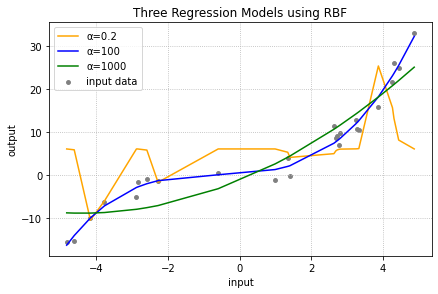

In [14]:
plt.title('Three Regression Models using RBF')
plt.grid(linestyle=':')

plt.scatter(x, y_true, s=60, marker='.', c='grey', label='input data')

plt.plot(use11[:,0], use11[:,1], c='orange', label='α=0.2')
plt.plot(use22[:,0], use22[:,1], c='blue', label='α=100')
plt.plot(use33[:,0], use33[:,1], c='green', label='α=1000')

plt.tight_layout()
plt.legend()

plt.xlabel('input')
plt.ylabel('output')
plt.show()